# Tutorial 1: 一致性测试

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# 示例二维矩阵
original_matrix = np.array([
    [0.1, 0.2, np.nan, 0.4],
    [0.5, np.nan, 0.7, 0.8],
    [np.nan, 0.6, 0.4, np.nan]
])

filled_matrix = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.5, 0.6, 0.4, 0.5]
])

# 提取全局非缺失值和填充值
original_values = original_matrix[~np.isnan(original_matrix)]
filled_values = filled_matrix[np.isnan(original_matrix)]

# 全局分布可视化
sns.kdeplot(original_values, label='Original Non-Missing', color='blue')
sns.kdeplot(filled_values, label='Filled Missing', color='orange')
plt.title("Global Distribution Comparison")
plt.legend()
plt.show()

# KS检验
ks_stat, p_value = ks_2samp(original_values, filled_values)
print(f"Global KS Statistic={ks_stat}, P-value={p_value}")


# 利用两套数据集进行一致性测试
# ipsc分化为内胚层数据集和ipsc分化为两种细胞类型的数据集

In [1]:
# ipsc分化成内胚层数据集

# 读取未填充的数据集
import pandas as pd
original_ipsc = pd.read_csv("./onlyfill_NA_SJ_counts.csv")
original_ipsc


,ERR1562084,ERR1562085,ERR1562086,ERR1562087,ERR1562088,ERR1562091,ERR1562092,ERR1562093,ERR1562094,ERR1562095,...,ERR1562266,ERR1562267,ERR1562269,ERR1562270,ERR1562271,ERR1562272,ERR1562273,annotated,coord.intron,intron_group
0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AAGAB_chr15:67236821-67254413-,AAGAB_chr15_67236821_-
1,25.0,NaN,NaN,NaN,21.0,70.0,NaN,NaN,NaN,NaN,...,NaN,201.0,21.0,NaN,63.0,NaN,26.0,1,AAGAB_chr15:67236821-67254558-,AAGAB_chr15_67236821_-
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,NaN,NaN,NaN,NaN,1,AAMDC_chr11:77821242-77842478+,AAMDC_chr11_77842478_+
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,AAMDC_chr11:77841061-77842478+,AAMDC_chr11_77842478_+
4,NaN,NaN,53.0,NaN,25.0,NaN,34.0,18.0,21.0,31.0,...,NaN,79.0,NaN,NaN,NaN,NaN,NaN,1,AASS_chr7:122078015-122078861-,AASS_chr7_122078015_-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ZRANB2_chr1:71065753-71066775-,ZRANB2_chr1_71066775_-
11681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,58.0,NaN,NaN,NaN,NaN,NaN,NaN,1,ZSWIM7_chr17:15977093-15978043-,ZSWIM7_chr17_15978043_-
11682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,...,13.0,NaN,31.0,23.0,NaN,NaN,27.0,1,ZSWIM7_chr17:15977914-15978043-,ZSWIM7_chr17_15978043_-
11683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ZWILCH_chr15:66505392-66508745+,ZWILCH_chr15_66505392_+


In [2]:
# ipsc分化成内胚层数据集

# 读取scasl填充的数据集
scasl_AS_ratio = pd.read_csv("scasl_as_rate.csv", index_col=0)
# 直接删除索引中不以 "chr" 开头的所有行
scasl_AS_ratio.drop(
    index=scasl_AS_ratio.index[~scasl_AS_ratio.index.str.startswith("chr")],
    inplace=True
)

scasl_AS_ratio



,ERR1562273,ERR1562163,ERR1562122,ERR1562222,ERR1562088,ERR1562261,ERR1562114,ERR1562244,ERR1562107,ERR1562101,...,ERR1562161,ERR1562108,ERR1562086,ERR1562160,ERR1562128,ERR1562121,ERR1562227,ERR1562092,ERR1562091,ERR1562162
Site,,,,,,,,,,,,,,,,,,,,,
chr10_100352497_100352621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.059829,0.028037,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000
chr10_100352497_100354426,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.940171,0.971963,1.000000,1.000000,1.000000,1.000000,1.000000,0.951220,1.000000
chr10_100354633_100356531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.966049,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
chr10_100354633_100360733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr10_100374013_100380982,0.151692,0.000000,0.151692,0.000000,0.151700,0.151701,0.151685,0.151700,0.560976,0.100000,...,0.151706,0.151706,0.151700,0.151693,0.151699,0.151693,0.151700,0.151689,0.000000,0.151688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_97310659_97348080,0.820375,0.821367,0.824438,0.786939,0.818156,0.826912,0.534884,0.823043,0.820216,0.652174,...,0.825669,1.000000,0.482759,0.237288,0.415730,1.000000,0.823692,0.600000,1.000000,0.160000
chrX_97315894_97348080,0.083093,0.082656,0.081220,0.098580,0.084137,0.080091,0.011628,0.081878,0.083188,0.000000,...,0.080662,0.000000,0.000000,0.000000,0.584270,0.000000,0.081582,0.000000,0.000000,0.840000
chrX_97346950_97348080,0.094638,0.094181,0.092514,0.112309,0.095850,0.091292,0.453488,0.093315,0.094798,0.347826,...,0.091899,0.000000,0.517241,0.762712,0.000000,0.000000,0.092988,0.400000,0.000000,0.000000


In [3]:
# 读取label文件
# label=pd.read_csv("onlyfillna_as_PRJEB15062_smart_seq2_label.csv",index_col=0)
# label 


label=pd.read_csv("PRJEB15062_smart_seq2_Developmental_stage.csv",index_col=0)
label

,type
Run,
ERR1562084,iPSC
ERR1562085,iPSC
ERR1562086,iPSC
ERR1562087,iPSC
ERR1562088,iPSC
...,...
ERR1562269,Endoderm
ERR1562270,Endoderm
ERR1562271,Endoderm


In [4]:
# 读取填充的as ratio矩阵
AS_martix=pd.read_csv("as_rate_fillna.csv",sep='\t',index_col='coord.intron')
AS_martix

,intron_group,annotated,ERR1562084,ERR1562085,ERR1562086,ERR1562087,ERR1562088,ERR1562091,ERR1562092,ERR1562093,...,ERR1562259,ERR1562260,ERR1562261,ERR1562266,ERR1562267,ERR1562269,ERR1562270,ERR1562271,ERR1562272,ERR1562273
coord.intron,,,,,,,,,,,,,,,,,,,,,
AAGAB_chr15:67236821-67254413-,AAGAB_chr15_67236821_-,1,0.931602,0.867055,0.869474,0.847394,0.851158,0.066667,0.861904,0.872349,...,0.946896,0.815783,0.815783,0.815783,0.826566,0.954825,0.815783,0.865605,0.815783,0.947835
AAGAB_chr15:67236821-67254558-,AAGAB_chr15_67236821_-,1,0.068398,0.132945,0.130526,0.152606,0.148842,0.933333,0.138096,0.127651,...,0.053104,0.184217,0.184217,0.184217,0.173434,0.045175,0.184217,0.134395,0.184217,0.052165
AAMDC_chr11:77821242-77842478+,AAMDC_chr11_77842478_+,1,0.366686,0.347646,0.359134,0.351054,0.366686,0.359134,0.366686,0.337902,...,0.376126,0.376126,0.376126,0.119816,0.376126,0.376126,0.376126,0.380772,0.376126,0.852471
AAMDC_chr11:77841061-77842478+,AAMDC_chr11_77842478_+,1,0.633314,0.652354,0.640866,0.648946,0.633314,0.640866,0.633314,0.662098,...,0.623874,0.623874,0.623874,0.880184,0.623874,0.623874,0.623874,0.619228,0.623874,0.147529
AASS_chr7:122078015-122078861-,AASS_chr7_122078015_-,1,0.470918,0.460222,0.566012,0.518276,0.406448,0.470918,0.971429,0.818182,...,0.521722,0.521722,0.521722,0.521722,0.181726,0.521722,0.521722,0.520550,0.513842,0.521722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRANB2_chr1:71065753-71066775-,ZRANB2_chr1_71066775_-,1,0.508494,0.511934,0.513883,0.500460,0.522013,0.513883,0.522013,0.533265,...,0.473574,0.473574,0.473574,0.473574,0.473574,0.473574,0.473574,0.454333,0.467672,0.473574
ZSWIM7_chr17:15977093-15978043-,ZSWIM7_chr17_15978043_-,1,0.508734,0.496765,0.523134,0.466447,0.523134,0.523134,0.523134,0.479638,...,0.523429,0.495103,0.495103,0.816901,0.495103,0.251914,0.383093,0.503137,0.487987,0.291536
ZSWIM7_chr17:15977914-15978043-,ZSWIM7_chr17_15978043_-,1,0.491266,0.503235,0.476866,0.533553,0.476866,0.476866,0.476866,0.520362,...,0.476571,0.504897,0.504897,0.183099,0.504897,0.748086,0.616907,0.496863,0.512013,0.708464


In [5]:
# AS_martix=AS_martix.iloc[:,2:].T
# AS_martix=pd.concat([AS_martix,label],axis=1)
# AS_martix

scasl_AS_ratio=scasl_AS_ratio.T
scasl_AS_ratio=pd.concat([scasl_AS_ratio,label],axis=1)
scasl_AS_ratio


,chr10_100352497_100352621,chr10_100352497_100354426,chr10_100354633_100356531,chr10_100354633_100360733,chr10_100374013_100380982,chr10_100374013_100381215,chr10_100381449_100388033,chr10_100381449_100388036,chr10_100527075_100529365,chr10_100527075_100529379,...,chrX_92103721_92105292,chrX_92104307_92105292,chrX_96758259_96881578,chrX_96763121_96881578,chrX_97310659_97348080,chrX_97315894_97348080,chrX_97346950_97348080,chrX_97310659_97383908,chrX_97348281_97383908,type
ERR1562273,0.00000,1.00000,1.0,0.0,0.151692,0.840559,0.114087,0.883519,0.0,1.0,...,0.000297,0.072668,0.000000,1.000000,0.820375,0.083093,0.094638,0.020120,0.973188,Endoderm
ERR1562163,0.00000,1.00000,1.0,0.0,0.000000,1.000000,0.288889,0.711111,0.0,1.0,...,0.000000,0.000000,0.000000,1.000000,0.821367,0.082656,0.094181,0.019947,0.973327,iPSC
ERR1562122,0.00000,1.00000,1.0,0.0,0.151692,0.840553,0.114082,0.883519,0.0,1.0,...,0.000000,0.000000,0.165779,0.828980,0.824438,0.081220,0.092514,0.019644,0.973792,iPSC
ERR1562222,0.00000,1.00000,1.0,0.0,0.000000,1.000000,0.114059,0.883570,0.0,1.0,...,0.000474,0.084604,0.000000,1.000000,0.786939,0.098580,0.112309,0.000000,1.000000,Endoderm
ERR1562088,0.00000,1.00000,1.0,0.0,0.151700,0.840558,0.114061,0.883550,0.0,1.0,...,0.000000,0.000000,0.165792,0.828976,0.818156,0.084137,0.095850,0.535714,0.464286,iPSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR1562121,0.00000,1.00000,1.0,0.0,0.151693,0.840568,0.114073,0.883523,0.0,1.0,...,0.000000,0.008696,0.165795,0.828979,1.000000,0.000000,0.000000,0.000000,1.000000,iPSC
ERR1562227,0.00000,1.00000,1.0,0.0,0.151700,0.840602,0.114022,0.883562,0.0,1.0,...,0.000415,0.085268,0.000000,1.000000,0.823692,0.081582,0.092988,0.000000,1.000000,Endoderm
ERR1562092,0.00000,1.00000,1.0,0.0,0.151689,0.840558,0.114084,0.883519,0.0,1.0,...,0.000000,0.010417,0.165776,0.828977,0.600000,0.000000,0.400000,0.000000,1.000000,iPSC
ERR1562091,0.04878,0.95122,1.0,0.0,0.000000,1.000000,0.114015,0.883568,0.0,1.0,...,0.000000,0.000000,0.165871,0.828974,1.000000,0.000000,0.000000,0.181818,0.818182,iPSC


In [6]:
import numpy as np
from scipy import stats
import pandas as pd
import ray

# Define the work function (Ray-compatible)
@ray.remote
def work(data, group_a, group_b):
    # Get the gene names (AS matrix columns)
    trans = data.columns[:-1]
    # Open the result file
    result = open(f"./diff_result_scasl_ray/{str(group_a)}_vs_{str(group_b)}_wilcoxon.txt", "w")
    for tran in trans.unique():
         # 取出所有名为 tran 的列，这里有可能是一列，也可能多列（重名）
        tmp = data.loc[:, data.columns == tran]

        # 分别在 group_a / group_b 下获取这部分子 DataFrame
        tmp_group1 = tmp[data['type'] == group_a]
        tmp_group2 = tmp[data['type'] == group_b]

        # 统一用 pd.melt 摊平
        group1 = pd.melt(tmp_group1)['value'].values
        group2 = pd.melt(tmp_group2)['value'].values

        # 统计检验
        statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
        result.write(f"{tran}\t{group_a}\t{group_b}\t{statistic}\t{p_value}\n")
    
    result.close()
    #     if data[tran].ndim>1:
    #         group1 = pd.melt(data[data['type'] == group_a][tran])['value']
    #         group2 = pd.melt(data[data['type'] == group_b][tran])['value']
    #         # print(group1)
    #         group1 = np.array(group1)
    #         group2 = np.array(group2)
    #         statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    #         result.write(f"{tran}\t{group_a}\t{group_b}\t{statistic}\t{p_value}\n")
    #     else:
    #         group1 = data[data['type'] == group_a][tran]
    #         group2 = data[data['type'] == group_b][tran]
    #         group1 = np.array(group1)
    #         group2 = np.array(group2)
    #         statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    #         result.write(f"{tran}\t{group_a}\t{group_b}\t{statistic}\t{p_value}\n")                        
    # result.close()

if __name__ == "__main__":
    # Initialize Ray
    ray.init(ignore_reinit_error=True,num_cpus=60)
    
    # Assuming AS_martix is a Pandas DataFrame loaded previously
    data = scasl_AS_ratio
    # data = AS_martix
    # for col in data.columns[:-1]:
    #  data[col] = data[col].astype(float)
    cell_type = np.array(data['type'].unique())
    
    # List to hold the Ray remote tasks
    tasks = []
    
    # Loop through each pair of cell types and submit tasks to Ray
    for i in range(len(cell_type)):
        for j in range(i + 1, len(cell_type)):
            group_a = cell_type[i]
            # print(group_a)
            group_b = cell_type[j]
            # print(group_b)
            # Submit the task to Ray
            # work(data, group_a, group_b)
            tasks.append(work.remote(data, group_a, group_b))
    
    # Wait for all tasks to finish
    ray.get(tasks)
    print("Waiting for all tasks to finish")


/home/hpw/miniconda3/envs/hpw/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-08 10:43:11,099	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-08 10:43:12,962	WARNING services.py:1996 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67084288 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=10.24gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2025-03-08 10:43:14,150	INFO worker.py:1752 -- Started a local Ray instance.

Waiting for all tasks to finish


In [ ]:
import numpy as np
import pandas as pd
import ray
from scipy import stats

# ---------------------------
# 1. 定义远程调用函数 (Ray-compatible)
# ---------------------------
@ray.remote
def work(data, group_a, group_b, frac, seed):
    """
    对给定 data 中，类型为 group_a 与 group_b 的样本做 Mann-Whitney U 检验。
    将结果输出到含有下采样比例和随机数种子信息的文件中。
    """
    # 获取除 'type' 列以外的所有列名（基因）
    trans = data.columns[:-1]  # 假设最后一列是 'type'

    # 这里将下采样比例 frac 和随机种子 seed 写入到输出文件名中，便于区分
    # output_filename = f"diff_result_NA_ray/sample_{int(frac*100)}_{seed}_{group_a}_vs_{group_b}_wilcoxon.txt"
    output_filename = f"diff_result_scasl_ray/sample_{int(frac*100)}_{seed}_{group_a}_vs_{group_b}_wilcoxon.txt"
    with open(output_filename, "w") as result:
        # 遍历每个转录本（基因）
        for tran in trans.unique():
            # 取出所有名为 tran 的列，这里有可能是一列或多列（重名）
            tmp = data.loc[:, data.columns == tran]

            # 分别在 group_a 和 group_b 下获取子 DataFrame
            tmp_group1 = tmp[data['type'] == group_a]
            tmp_group2 = tmp[data['type'] == group_b]

            # 统一用 pd.melt 摊平，保证后续能做统计检验
            group1 = pd.melt(tmp_group1)['value'].values
            group2 = pd.melt(tmp_group2)['value'].values

            # 统计检验 (Mann-Whitney U test)
            statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            # 写入结果
            result.write(f"{tran}\t{group_a}\t{group_b}\t{statistic}\t{p_value}\n")


# ---------------------------
# 2. 主程序
# ---------------------------
if __name__ == "__main__":
    # 初始化 Ray
    # 如果本地环境不需要 60 个 CPU，请自行修改；ignore_reinit_error=True 是为了防止重复初始化报错
    ray.init(ignore_reinit_error=True, num_cpus=60)
    
    # 假设 AS_matrix 是一个事先已经加载的 DataFrame
    # 例如: AS_matrix = pd.read_csv("your_data.csv")
    # 这里我们假设它已经在环境中
    # -------------
    # AS_matrix = ...

    # 需要的下采样比例
    fracs = [0.75, 0.50, 0.25]
    # 9 个随机数种子（示例 42 ~ 50）
    seeds = [41, 42,43, 44, 45, 46, 47, 48, 49, 50]

    # 用于收集提交给 Ray 的任务
    tasks = []

    # 对每个 frac, seed 进行下采样，并提交 Ray 任务
    for frac in fracs:
        for seed in seeds:
            # 下采样
            # data_sampled = AS_martix.sample(frac=frac, random_state=seed)
            
            data_sampled = scasl_AS_ratio.sample(frac=frac, random_state=seed)

            # 获取每个细胞类型
            cell_types = data_sampled['type'].unique()

            # 两两类型之间做统计检验
            for i in range(len(cell_types)):
                for j in range(i + 1, len(cell_types)):
                    group_a = cell_types[i]
                    group_b = cell_types[j]
                    # 提交任务给 Ray
                    tasks.append(work.remote(data_sampled, group_a, group_b, frac, seed))

    # 等待所有任务结束
    ray.get(tasks)
    print("All tasks have finished.")


In [ ]:
import os
import glob
import pandas as pd

# 指定输入文件夹和输出文件夹
input_folder = "diff_result_NA_ray"
output_folder = "diff_result_NA_ray_filtered"

# 若输出文件夹不存在，自动创建
os.makedirs(output_folder, exist_ok=True)

# 找到所有 .txt 文件
all_files = glob.glob(os.path.join(input_folder, "*.txt"))

# 遍历每个文件并处理
for file_path in all_files:
    # 1. 读取文件；无表头时，header=None
    wilcoxon = pd.read_csv(file_path, sep='\t', header=None)
    wilcoxon.columns = ['gene_name', 'group_a', 'group_b', 'statistic', 'p_value']
    
    # 2. 仅保留 p_value < 0.01 的行
    wilcoxon = wilcoxon[wilcoxon['p_value'] < 0.01]
    
    # 3. 拆分 gene_name 字段，示例中假设基因名包含 '_'
    # wilcoxon_split = wilcoxon['gene_name'].str.split('_', expand=True)
    # unique_genes = wilcoxon_split[0].unique()
    
    unique_genes = wilcoxon['gene_name'].unique()
    
    # 4. 生成输出文件路径。将原始文件名的后缀改为 _diff_event_gene.csv
    filename = os.path.basename(file_path)  # 例如 "sample_75_Endoderm_vs_iPSC_wilcoxon.txt"
    output_file_name = filename.replace(".txt", "_diff_event_gene.csv")
    output_file_path = os.path.join(output_folder, output_file_name)
    
    # 5. 将结果写入文件
    pd.DataFrame(unique_genes).to_csv(output_file_path, index=False, header=False)

print("All files have been processed.")



In [7]:
# 读取填充数据分析的差异剪接事件
diff_event=pd.read_table("diff_result_NA_ray/iPSC_vs_Endoderm_wilcoxon.txt",header=None)
#修改阈值设置为0.1或者0.01
diff_event=diff_event[diff_event[4]<0.01]
diff_event

,0,1,2,3,4
2,AAMDC_chr11:77821242-77842478+,iPSC,Endoderm,6528.0,3.470451e-05
3,AAMDC_chr11:77841061-77842478+,iPSC,Endoderm,3686.0,2.939943e-09
9,AASS_chr7:122081596-122085577-,iPSC,Endoderm,1639.5,3.826908e-03
10,AASS_chr7:122081596-122086011-,iPSC,Endoderm,10999.0,7.252766e-03
11,AASS_chr7:122098577-122098744-,iPSC,Endoderm,1700.0,8.499023e-03
...,...,...,...,...,...
9691,ZRANB2_chr1:71065753-71066775-,iPSC,Endoderm,3861.0,1.996647e-11
9692,ZSWIM7_chr17:15977093-15978043-,iPSC,Endoderm,3012.0,2.374085e-03
9693,ZSWIM7_chr17:15977914-15978043-,iPSC,Endoderm,1608.0,2.417490e-03
9694,ZWILCH_chr15:66505392-66508745+,iPSC,Endoderm,3337.0,8.673550e-06


In [8]:
# 读取未填充的AS概率矩阵

AS_ratio=pd.read_csv("NA_as_rate.csv",sep='\t',index_col="coord.intron")

# 读取原始剪接counts矩阵

SJ_df=pd.read_csv("onlyfill_NA_SJ_counts.csv",index_col="coord.intron")


In [ ]:
AS_ratio

In [ ]:
SJ_df

In [ ]:
diff_event

In [9]:
# 将数据转置并且合并label
AS_ratio=AS_ratio.T[diff_event[0]]
AS_ratio=pd.concat([AS_ratio.iloc[:-2,:],label],axis=1)
AS_ratio

,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77841061-77842478+,AASS_chr7:122081596-122085577-,AASS_chr7:122081596-122086011-,AASS_chr7:122081596-122086011-,AASS_chr7:122098577-122098744-,AASS_chr7:122101681-122113117-,AASS_chr7:122101681-122144160-,AASS_chr7:122101681-122144160-,...,ZNG1A_chr9:177821-178815-,ZNG1B_chr2:113438023-113439019+,ZNG1B_chr2:113454779-113457064+,ZNG1B_chr2:113454779-113460672+,ZRANB2_chr1:71065753-71066775-,ZSWIM7_chr17:15977093-15978043-,ZSWIM7_chr17:15977914-15978043-,ZWILCH_chr15:66505392-66508745+,ZWILCH_chr15:66505392-66508840+,type
ERR1562084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.289474,0.710526,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562086,NaN,NaN,NaN,0.0,0.829787,0.8125,0.632653,0.982143,0.017857,0.018519,...,NaN,NaN,0.086957,0.913043,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562088,NaN,NaN,NaN,0.0,0.733333,0.88,NaN,0.827586,0.172414,0.16129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR1562271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Endoderm
ERR1562272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Endoderm
ERR1562273,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,Endoderm
ERR1562210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endoderm


In [10]:
SJ_df=SJ_df.T[diff_event[0]]
SJ_df=pd.concat([SJ_df.iloc[:-2,:],label],axis=1)
SJ_df

,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77841061-77842478+,AASS_chr7:122081596-122085577-,AASS_chr7:122081596-122086011-,AASS_chr7:122081596-122086011-,AASS_chr7:122098577-122098744-,AASS_chr7:122101681-122113117-,AASS_chr7:122101681-122144160-,AASS_chr7:122101681-122144160-,...,ZNG1A_chr9:177821-178815-,ZNG1B_chr2:113438023-113439019+,ZNG1B_chr2:113454779-113457064+,ZNG1B_chr2:113454779-113460672+,ZRANB2_chr1:71065753-71066775-,ZSWIM7_chr17:15977093-15978043-,ZSWIM7_chr17:15977914-15978043-,ZWILCH_chr15:66505392-66508745+,ZWILCH_chr15:66505392-66508840+,type
ERR1562084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,27.0,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562086,NaN,NaN,NaN,0.0,39.0,39.0,31.0,55.0,1.0,1.0,...,NaN,NaN,2.0,21.0,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
ERR1562088,NaN,NaN,NaN,NaN,22.0,22.0,NaN,24.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR1562271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN,Endoderm
ERR1562272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,Endoderm
ERR1562273,NaN,NaN,21.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,Endoderm
ERR1562210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endoderm


In [ ]:
import os
import numpy as np
import pandas as pd
import ray

ray.init(num_cpus=60,ignore_reinit_error=True)  # 初始化 Ray

cell_type = np.array(label['type'].unique())

@ray.remote
def compare_groups_as_mean(data_as, data_sj, group_a, group_b):
    # Get the gene names (AS matrix columns)
    trans = data_as.columns[:-1]
    # Create the directory if it does not exist
    os.makedirs("diff_result_stats/", exist_ok=True)
    result_plot_path = f"diff_result_stats/{str(group_a)}_vs_{str(group_b)}_DAS_plot_tran.txt"
    result_path = f"diff_result_stats/{str(group_a)}_vs_{str(group_b)}_DAS_tran.txt"
    
    with open(result_plot_path, "w") as result_plot, open(result_path, "w") as result:
        result_plot.write("tran_id\tcell_type\tAS_mean\tAS_prob\n")
        result.write("tran_id\tgroup_one\tgroup_two\tgroup_one_AS_mean\tgroup_two_AS_mean\tmean_diff\n")
        
        # 遍历每个转录本
        for tran in trans.unique():
            # 假设这段代码在一个 for tran in trans: for group_a in ...: for group_b in ...: 的循环内
            # 或者你有其他逻辑来获取 tran / group_a / group_b

            # ---- 1) 对 data_as 做均值统计 ----
            # 先取出所有列名 == tran 的列（可能 1 列或多列）
            tmp_as = data_as.loc[:, data_as.columns == tran]

            # 分别索引出 group_a、group_b
            tmp_as_group1 = tmp_as[data_as['type'] == group_a]
            tmp_as_group2 = tmp_as[data_as['type'] == group_b]

            # 用 melt 统一“摊平”成一列，取 'value' 列并计算均值
            group1_vals = pd.melt(tmp_as_group1)['value']
            group2_vals = pd.melt(tmp_as_group2)['value']
            group1_mean = group1_vals.mean()
            group2_mean = group2_vals.mean()

            # ---- 2) 对 data_sj 做 >0 的概率计算 ----
            tmp_sj = data_sj.loc[:, data_sj.columns == tran]

            tmp_sj_group1 = tmp_sj[data_sj['type'] == group_a]
            tmp_sj_group2 = tmp_sj[data_sj['type'] == group_b]

            group1_tran = pd.melt(tmp_sj_group1)['value']
            group2_tran = pd.melt(tmp_sj_group2)['value']

            # group1_as_prob = (group1_tran > 0).sum() / len(group1_tran) if len(group1_tran) else 0
            # group2_as_prob = (group2_tran > 0).sum() / len(group2_tran) if len(group2_tran) else 0
            
            # 统计非缺失值的比率
            group1_as_prob = group1_tran.notna().sum() / len(group1_tran) if len(group1_tran) else 0
            group2_as_prob = group2_tran.notna().sum() / len(group2_tran) if len(group2_tran) else 0
            
             # ---- 3) 检查 group1_vals 或 group2_vals 是否为恒定值 ----
            if group1_vals.nunique() <= 1 or group2_vals.nunique() <= 1:
                continue

            # ---- 4) 写出结果 ----
            mean_diff = group1_mean - group2_mean

            result.write(
            f"{tran}\t{group_a}\t{group_b}\t"
            f"{group1_mean}\t{group2_mean}\t{mean_diff}\n"
            )

            result_plot.write(f"{tran}\t{group_a}\t{group1_mean}\t{group1_as_prob}\n")
            result_plot.write(f"{tran}\t{group_b}\t{group2_mean}\t{group2_as_prob}\n")


if __name__ == "__main__":
    # 向 Ray 提交并行任务
    futures = []
    for i in range(len(cell_type)):
        for j in range(i + 1, len(cell_type)):
            group_a = cell_type[i]
            group_b = cell_type[j]
            # 使用 Ray 的 remote 函数提交任务
            future = compare_groups_as_mean.remote(AS_ratio, SJ_df, group_a, group_b)
            futures.append(future)
    
    # 等待所有任务完成
    ray.get(futures)
    ray.shutdown()
    print("done.")


In [11]:
DAS=pd.read_table("diff_result_stats/iPSC_vs_Endoderm_DAS_tran.txt")
DAS

,tran_id,group_one,group_two,group_one_AS_mean,group_two_AS_mean,mean_diff
0,AAMDC_chr11:77821242-77842478+,iPSC,Endoderm,0.536196,0.519519,0.016677
1,AAMDC_chr11:77841061-77842478+,iPSC,Endoderm,0.457827,0.457087,0.000739
2,AASS_chr7:122081596-122086011-,iPSC,Endoderm,0.851501,0.894479,-0.042979
3,AASS_chr7:122098577-122098744-,iPSC,Endoderm,0.914537,0.716667,0.197871
4,AASS_chr7:122101681-122144160-,iPSC,Endoderm,0.076491,0.037037,0.039454
...,...,...,...,...,...,...
4614,ZRANB2_chr1:71065753-71066775-,iPSC,Endoderm,0.726737,0.956250,-0.229513
4615,ZSWIM7_chr17:15977093-15978043-,iPSC,Endoderm,0.524983,0.238556,0.286427
4616,ZSWIM7_chr17:15977914-15978043-,iPSC,Endoderm,0.475017,0.761444,-0.286427
4617,ZWILCH_chr15:66505392-66508745+,iPSC,Endoderm,0.200565,0.448607,-0.248042


In [12]:
# 读取注释信息

# Align the indices of the Series objects before comparison
result = original_ipsc[['annotated', 'coord.intron']].merge(DAS[['tran_id']], left_on='coord.intron', right_on='tran_id', how='inner')
result

,annotated,coord.intron,tran_id
0,1,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77821242-77842478+
1,1,AAMDC_chr11:77821242-77842478+,AAMDC_chr11:77821242-77842478+
2,1,AAMDC_chr11:77841061-77842478+,AAMDC_chr11:77841061-77842478+
3,1,AASS_chr7:122081596-122086011-,AASS_chr7:122081596-122086011-
4,1,AASS_chr7:122081596-122086011-,AASS_chr7:122081596-122086011-
...,...,...,...
5605,1,ZRANB2_chr1:71065753-71066775-,ZRANB2_chr1:71065753-71066775-
5606,1,ZSWIM7_chr17:15977093-15978043-,ZSWIM7_chr17:15977093-15978043-
5607,1,ZSWIM7_chr17:15977914-15978043-,ZSWIM7_chr17:15977914-15978043-
5608,1,ZWILCH_chr15:66505392-66508745+,ZWILCH_chr15:66505392-66508745+


In [13]:
DAS=pd.read_table("diff_result_stats/iPSC_vs_Endoderm_DAS_tran.txt")
# ipsc到endoderm的差异上调事件,小于-0.01
DAS_up=DAS[DAS['mean_diff']<-0.05]
# ipsc到endoderm的差异下调事件
DAS_down=DAS[DAS['mean_diff']>0.05]
DAS_up.to_csv("./diff_result_stats/DAS_up.csv",index=False)
DAS_down.to_csv("./diff_result_stats/DAS_down.csv",index=False)
DAS_merge=pd.concat([DAS_up['tran_id'],DAS_down['tran_id']],axis=0)
# 保存shangdiao和xiadiao的基因
pd.DataFrame(DAS_up['tran_id'].str.split('_',expand=True)[0].unique()).to_csv("./diff_result_stats/DAS_up_gene.csv",index=False,header=False)
pd.DataFrame(DAS_down['tran_id'].str.split('_',expand=True)[0].unique()).to_csv("./diff_result_stats/DAS_down_gene.csv",index=False,header=False)
pd.DataFrame(DAS_merge.str.split('_',expand=True)[0].unique()).to_csv("./diff_result_stats/DAS_merge_gene.csv",index=False,header=False)
print("the number of DAS：")
print(len(DAS_merge))
print("the number of DASG：")
print(len(DAS_merge.str.split('_',expand=True)[0].unique()))

the number of DAS：
1663
the number of DASG：
780


In [14]:
# 差异剪接绘图分析数据的准备
import pandas as pd
results=pd.read_table("diff_result_stats/iPSC_vs_Endoderm_DAS_tran.txt")
result_plot=pd.read_table("diff_result_stats/iPSC_vs_Endoderm_DAS_plot_tran.txt")
# result_plot
# results
result_plot=result_plot[result_plot['tran_id'].isin(diff_event[0])]
results=results[results['tran_id'].isin(diff_event[0])]
results=results.sort_values(by='mean_diff',ascending=False)
results=results.dropna()
# results=results[results['mean_diff']<-0.1]

# new add
results_up=results[results['mean_diff']<-0.1]
results_down=results[results['mean_diff']>0.1]
# results
results_plot=result_plot.dropna()
results_plot=results_plot.set_index("tran_id")
# results_plot=results_plot.loc[results.loc[:,'tran_id'][:10]]
# results_plot=results_plot.loc[results.loc[:,'tran_id'][-10:]]

#new add
results_plot_up=results_plot.loc[results.loc[:,'tran_id'][:10]]
results_plot_down=results_plot.loc[results.loc[:,'tran_id'][-20:-10]]
results_plot=pd.concat([results_plot_up,results_plot_down],axis=0)
# results_plot=results_plot.loc[results.loc[:,'tran_id']]
# results_plot=results_plot.sort_values(by='AS_mean',ascending=False)
results_plot

,cell_type,AS_mean,AS_prob
tran_id,,,
DNMT3B_chr20:32802471-32805337+,iPSC,0.879212,0.857143
DNMT3B_chr20:32802471-32805337+,Endoderm,0.007246,0.018182
PICALM_chr11:85978094-85981128-,iPSC,0.852306,0.261905
PICALM_chr11:85978094-85981128-,Endoderm,0.117623,0.054545
NAA38_chr17:7857199-7857382-,iPSC,0.956364,0.119048
NAA38_chr17:7857199-7857382-,Endoderm,0.225494,0.127273
PICALM_chr11:85976683-85978069-,iPSC,0.871247,0.261905
PICALM_chr11:85976683-85978069-,Endoderm,0.158597,0.072727
PRPF39_chr14:45109781-45110093+,iPSC,0.961118,0.190476


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


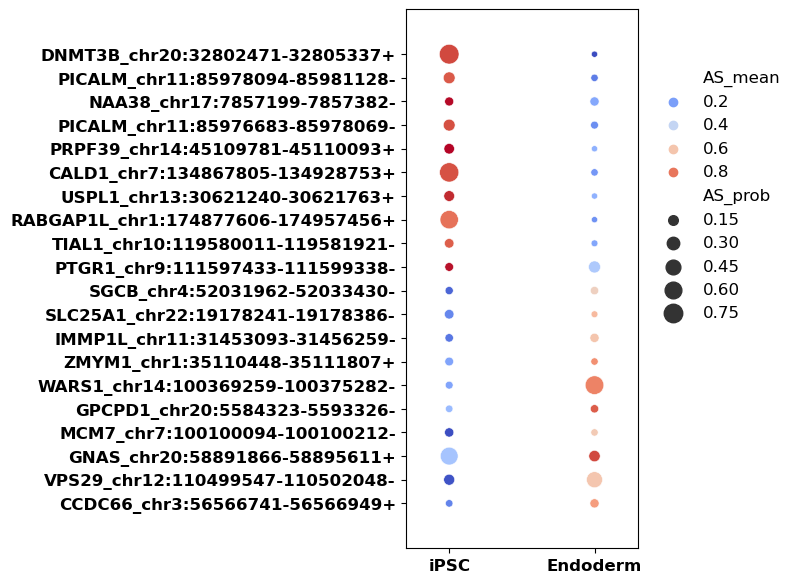

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import pandas as pd

# 假设 results_plot 已经存在并且包含 'AS_mean', 'AS_prob', 'cell_type', 'tran_id' 列
# 转换数据类型
results_plot['AS_mean'] = results_plot['AS_mean'].astype(float)
results_plot['AS_prob'] = results_plot['AS_prob'].astype(float)

# 获取字体路径
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold_Italic.ttf'

# 创建一个字体属性
prop = font_manager.FontProperties(fname=font_path)

# 设置全局字体（例如，使用 'Times New Roman' 字体）
plt.rcParams['font.family'] =  prop.get_name()  # 设置字体
plt.rcParams['font.size'] = 12                # 设置字体大小

# # 全局设置刻度字体加粗
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['xtick.major.width'] = 2
# plt.rcParams['ytick.major.width'] = 2
# plt.rcParams['xtick.major.size'] = 7
# plt.rcParams['ytick.major.size'] = 7

# 创建图和轴对象
fig, ax = plt.subplots(figsize=(3, 7))

# 绘制散点图
scatter = sns.scatterplot(
    data=results_plot,
    x='cell_type',
    y='tran_id',
    size='AS_prob',
    hue='AS_mean',
    sizes=(20, 200),
    palette='coolwarm',
    ax=ax
)

# 移除x轴和y轴的标签
ax.set_xlabel('')
ax.set_ylabel('')

# 设置刻度标签字体加粗
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


# 调整图例的间距和位置
legend = ax.legend(
    bbox_to_anchor=(1.05,0.9),  # 图例的位置
    loc='upper left',          # 图例的锚点
    borderaxespad=0,           # 图例边框与图表的距离
    ncol=1,                    # 图例分为两列
    frameon=False,             # 去掉图例的边框
    labelspacing=0.5,            # 增加标签之间的垂直间距
    columnspacing=1.5          # 增加列之间的水平间距
)

# 调整轴的边距，使散点居中
# 方法一: 使用 ax.margins
ax.margins(x=0.3, y=0.1)  # x和y方向各增加20%的边距

# 方法二：使用 fig.subplots_adjust（可选）
# 你可以取消注释以下行来尝试另一种调整方法
# fig.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

# 保存图片为高分辨率的pdf文件
# plt.savefig('./diff_result_stats/Das_plot.pdf', dpi=600, bbox_inches='tight')

# 显示图表
plt.show()

In [16]:
result_final=result[result['coord.intron'].isin(results_plot.index)]
result_final

,annotated,coord.intron,tran_id
370,1,CALD1_chr7:134867805-134928753+,CALD1_chr7:134867805-134928753+
433,1,CCDC66_chr3:56566741-56566949+,CCDC66_chr3:56566741-56566949+
1113,1,GNAS_chr20:58891866-58895611+,GNAS_chr20:58891866-58895611+
1679,1,MCM7_chr7:100100094-100100212-,MCM7_chr7:100100094-100100212-
1882,1,NAA38_chr17:7857199-7857382-,NAA38_chr17:7857199-7857382-
2196,1,PICALM_chr11:85976683-85978069-,PICALM_chr11:85976683-85978069-
2351,1,PRPF39_chr14:45109781-45110093+,PRPF39_chr14:45109781-45110093+
2466,1,PTGR1_chr9:111597433-111599338-,PTGR1_chr9:111597433-111599338-
2520,1,RABGAP1L_chr1:174877606-174957456+,RABGAP1L_chr1:174877606-174957456+
3105,1,SLC25A1_chr22:19178241-19178386-,SLC25A1_chr22:19178241-19178386-


In [17]:
# 读取完整的剪接基因数据集
AS_ratio=pd.read_csv("./diff_result_stats/DAS_merge_gene.csv",sep='\t',header=None)
# AS_ratio
label['type']

Run
ERR1562084        iPSC
ERR1562085        iPSC
ERR1562086        iPSC
ERR1562087        iPSC
ERR1562088        iPSC
                ...   
ERR1562269    Endoderm
ERR1562270    Endoderm
ERR1562271    Endoderm
ERR1562272    Endoderm
ERR1562273    Endoderm
Name: type, Length: 141, dtype: object

In [ ]:
# 测试算法的一致性
import numpy as np
import pandas as pd
all_as = pd.read_csv("scasl_Endoderm_vs_iPSC_wilcoxon_diff_event_gene.csv", index_col=0,header=None)
# 遍历文件夹下的文件

# 指定输入文件夹和输出文件夹
input_folder = "diff_result_scasl_ray_filtered"
result=[]

# 找到所有 .txt 文件
all_files = glob.glob(os.path.join(input_folder, "*.csv"))
for file_path in all_files:
    part_as=pd.read_csv(file_path, index_col=0,header=None)
    number=len(part_as)
    # 取两个数据集的交集
    intersection = all_as.index.intersection(part_as.index)
    precision = len(intersection) / len(part_as) if len(part_as) else 0
    recall = len(intersection) / len(all_as) if len(all_as) > 0 else 0
    
    
    # 保存结果
    result.append({
        'Sampling Ratio': file_path.split("/")[-1].split("_")[1],
        'Precision': precision,
        'Recall': recall,
        "number of as":number
    })

# 将结果转换为 DataFrame 进行展示
results_df = pd.DataFrame(result)
# 将结果保存为 CSV 文件
results_df.to_csv("scasl_Precision_Recall_results.csv", index=False)

In [18]:
# 绘制小提琴图
import pandas as pd
data_scasl = pd.read_csv("../emtab3929/emtab3929_scasl_5_vs_6_Precision_Recall_results.csv")
data_scasl

,Sampling Ratio,Precision,Recall,number of as
0,50,0.985126,0.783051,9614
1,50,0.984991,0.754196,9261
2,50,0.978323,0.850765,10518
3,50,0.982779,0.816288,10046
4,75,0.979102,0.918065,11341
5,75,0.976311,0.937081,11609
6,50,0.975214,0.839272,10409
7,25,0.967021,0.654568,8187
8,75,0.974425,0.932451,11574
9,75,0.982765,0.924018,11372


In [19]:
data = pd.read_csv("../emtab3929/emtab3929_5_vs_6_Precision_Recall_results.csv")
data

,Sampling Ratio,Precision,Recall,number of as
0,50,0.996154,0.945849,13782
1,25,0.994801,0.843610,12309
2,75,0.995221,0.975611,14229
3,50,0.997585,0.939097,13664
4,50,0.996472,0.933999,13605
5,75,0.991412,0.970307,14206
6,25,0.997258,0.852015,12401
7,75,0.988766,0.970169,14242
8,25,0.996659,0.863245,12572
9,75,0.988824,0.963142,14138


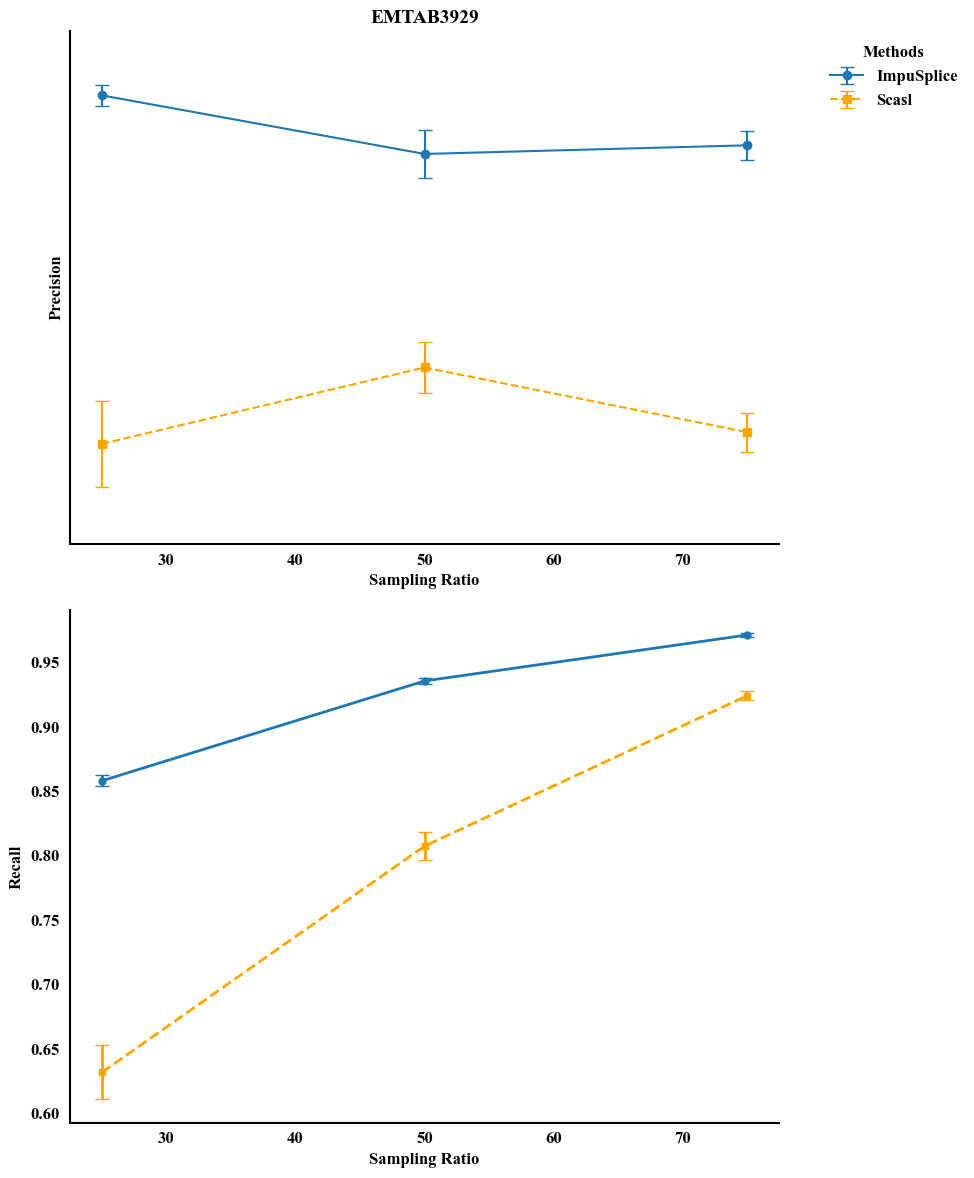

In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl
# import matplotlib.patches as mpatches


# 指定 Times New Roman 字体文件的路径
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'  # 请替换为你本地 Times New Roman 字体文件的实际路径

# 将字体文件添加到 fontManager 中
fm.fontManager.addfont(font_path)

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# 全局设置坐标轴边框的线宽
mpl.rcParams['axes.linewidth'] = 1.5

# 如果需要，也可以设置主要刻度线的宽度
mpl.rcParams['xtick.major.width'] = 2.0
mpl.rcParams['ytick.major.width'] = 2.0
# sns.set_theme(font="Times New Roman", font_scale=1.2)


# 全局关闭 x 和 y 轴两侧的刻度线显示
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['ytick.right'] = False

# import matplotlib as mpl
# import matplotlib.font_manager as fm

# # 指定 Times New Roman 字体文件的路径，确保路径正确
# font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
# fm.fontManager.addfont(font_path)

# # 全局设置字体
# mpl.rcParams['font.family'] = 'Times New Roman'
# mpl.rcParams['font.sans-serif'] = ['Times New Roman']
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['axes.titlesize'] = 16
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
# mpl.rcParams['legend.fontsize'] = 12  # 如果需要设置 legend 字体大小
# mpl.rcParams['legend.title_fontsize'] = 12




# Compute mean and standard error grouped by Sampling Ratio for both datasets
def compute_stats(df):
    return df.groupby("Sampling Ratio").agg(
        Precision_Mean=("Precision", "mean"),
        Precision_SE=("Precision", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        Recall_Mean=("Recall", "mean"),
        Recall_SE=("Recall", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    ).reset_index()

grouped1 = compute_stats(data)
grouped2 = compute_stats(data_scasl)

# Plot
# fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharey=False)
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=False)

# Precision plot
axes[0].errorbar(
    grouped1["Sampling Ratio"],
    grouped1["Precision_Mean"],
    yerr=grouped1["Precision_SE"],
    marker="o",
    capsize=5,
    linestyle="-",
    linewidth=1.5,
    label="ImpuSplice"
)
axes[0].errorbar(
    grouped2["Sampling Ratio"],
    grouped2["Precision_Mean"],
    yerr=grouped2["Precision_SE"],
    marker="s",
    capsize=5,
    linestyle="--",
    linewidth=1.5,
    label="Scasl",
    color="orange"
)
axes[0].set_title("EMTAB3929", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Sampling Ratio", fontsize=12)
axes[0].set_ylabel("Precision", fontsize=12)
# 设置 y 轴的范围为 0.1 到 0.8
axes[0].set_ylim(0.97, 1)
# 设置 y 轴刻度间隔为 0.1
axes[0].set_yticks(np.arange(0.9, 1, 0.1))

# axes[0].legend()

# Recall plot
axes[1].errorbar(
    grouped1["Sampling Ratio"],
    grouped1["Recall_Mean"],
    yerr=grouped1["Recall_SE"],
    marker="o",
    capsize=5,
    markersize=5,
    linestyle="-",
    linewidth=2,
    label="ImpuSplice"
)
axes[1].errorbar(
    grouped2["Sampling Ratio"],
    grouped2["Recall_Mean"],
    yerr=grouped2["Recall_SE"],
    marker="s",
    capsize=5,
    linestyle="--",
    linewidth=2,
     markersize=5,
    label="Scasl",
    color="orange"
)
# axes[1].set_title("Recall by Sampling Ratio", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Sampling Ratio", fontsize=12)
axes[1].set_ylabel("Recall", fontsize=12)

#设置legend
axes[0].legend(title="Methods", fontsize=12,frameon=False,bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
sns.despine()
# 保存为高分辨率的pdf文件
plt.savefig('../emtab3929/Precision_Recall_plot.pdf', dpi=600, bbox_inches='tight')
plt.show()

